In [47]:
import os
import glob

import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

In [29]:
def initialize_lattice(N):
    while True:
        lattice = np.random.choice([-1, 1], size=N)
        if lattice.sum() == 0:  # generate lattice with half up spins and half down spins
            return lattice

In [9]:
def bc(lattice, x):
    if x >= len(lattice):
        return 0
    elif x < 0:
        return len(lattice) - 1
    else:
        return x

In [61]:
def plot_lattice(lattice, i, moves, save=False):
    fig, ax = plt.subplots(figsize=(6, 3))
    N = len(lattice)
    lattice = lattice[None, :]
    ax.imshow(lattice, cmap='bwr', origin='lower')
    ax.set_title(f'$t = {i}$')
    ax.tick_params(axis='both', which='both', length=0)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    fig.tight_layout()
    if save:
        fig.savefig(f'figs/ising-model/1d/T-{str(T).replace(".", "_")}/t_{str(i).rjust(len(str(moves)), "0")}.jpg', dpi=150)
        
    return fig

In [114]:
def simulate(lattice, moves, T, J, animate=False, ani_interval=None):
    # maintain 1:1 spin ratio
    if animate:
        fig = plot_lattice(lattice, 0, moves, save=True)  # initial lattice
        plt.close(fig=fig)

    N = lattice.shape
    for i in range(1, moves + 1):
        _N = np.random.randint(N)
        _state = lattice[_N]
        _energy = -J * _state * (lattice[bc(lattice, _N+1)] + lattice[bc(lattice, _N-1)])
        energy_new = J * _state * (lattice[bc(lattice, _N+1)] + lattice[bc(lattice, _N-1)])
        if energy_new < _energy:
            idx = np.random.choice(np.where(lattice == -1 * _state)[0])
            _energy_new = J * lattice[idx] * (lattice[bc(lattice, idx+1)] + lattice[bc(lattice, idx-1)])
            if _energy_new < energy_new:
                lattice[_N] *= -1
                lattice[idx] *= -1
                
        elif np.random.random() < np.exp(-energy_new / T):
            idx = np.random.choice(np.where(lattice == -1 * _state)[0])
            _energy_new = J * lattice[idx] * (lattice[bc(lattice, idx+1)] + lattice[bc(lattice, idx-1)])
            if _energy_new < energy_new:
                lattice[_N] *= -1
                lattice[idx] *= -1

        if animate:
            if i % ani_interval == 0:
                fig = plot_lattice(lattice, i, moves, save=True)
                plt.close(fig=fig)

    plot_lattice(lattice, moves, moves, save=False)

    return lattice

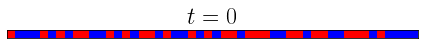

In [115]:
N = 50
lattice = initialize_lattice(N)
fig = plot_lattice(lattice, 0, 0, save=False)

/var/folders/q3/lfzvcqd97_q0vvhx191jh1lm0000gn/T/ipykernel_31194/577694817.py:20: RuntimeWarning: divide by zero encountered in divide
  elif np.random.random() < np.exp(-energy_new / T):
/var/folders/q3/lfzvcqd97_q0vvhx191jh1lm0000gn/T/ipykernel_31194/577694817.py:20: RuntimeWarning: invalid value encountered in divide
  elif np.random.random() < np.exp(-energy_new / T):


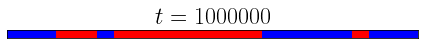

In [122]:
N = 50
N_moves = 1000000
T = 0
J = 2

lattice = simulate(lattice, N_moves, T, J, animate=False, ani_interval=100)

In [99]:
# generate GIF
path_in = 'figs/ising-model/1d/T-0_01/t_*.jpg'
path_out = 'figs/ising-model/1d/T-0_01/simulation.gif'

imgs = (Image.open(f) for f in sorted(glob.glob(path_in)))
img = next(imgs)
img.save(
    fp=path_out, format='GIF', append_images=imgs,
    save_all=True, duration=50, loop=0,
)